In [1]:
#Import neccesary libraries
import requests
import pandas as pd
import timeub
from datetime import datetime,timedelta
from datetime import date

### Token is in the end of URL(i.e 969473)
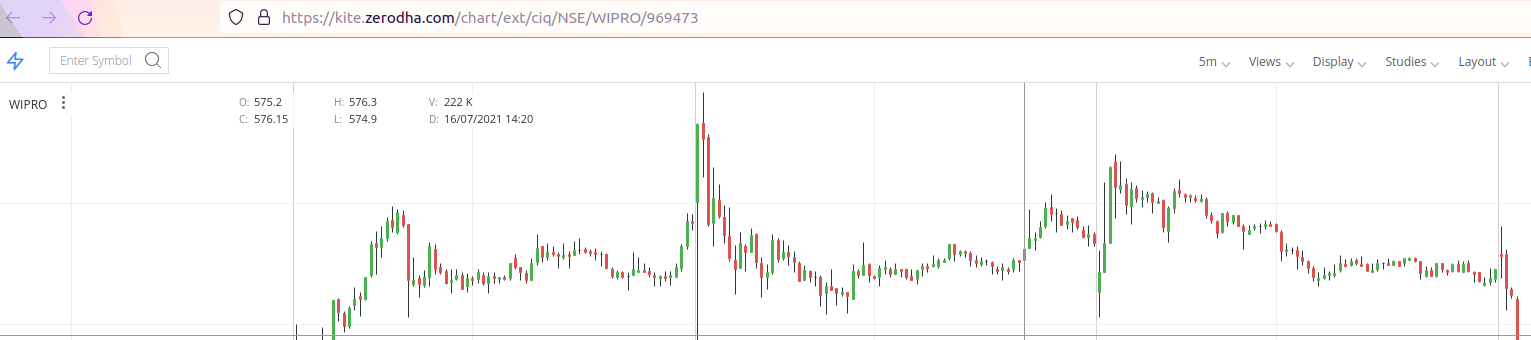

### For authtoken follow below steps
### 1. Inspect element or F12 for the above chart
### 2. Goto network and refresh the URL
### 3. Search for below link you will get authtoken as shown in below screenshot
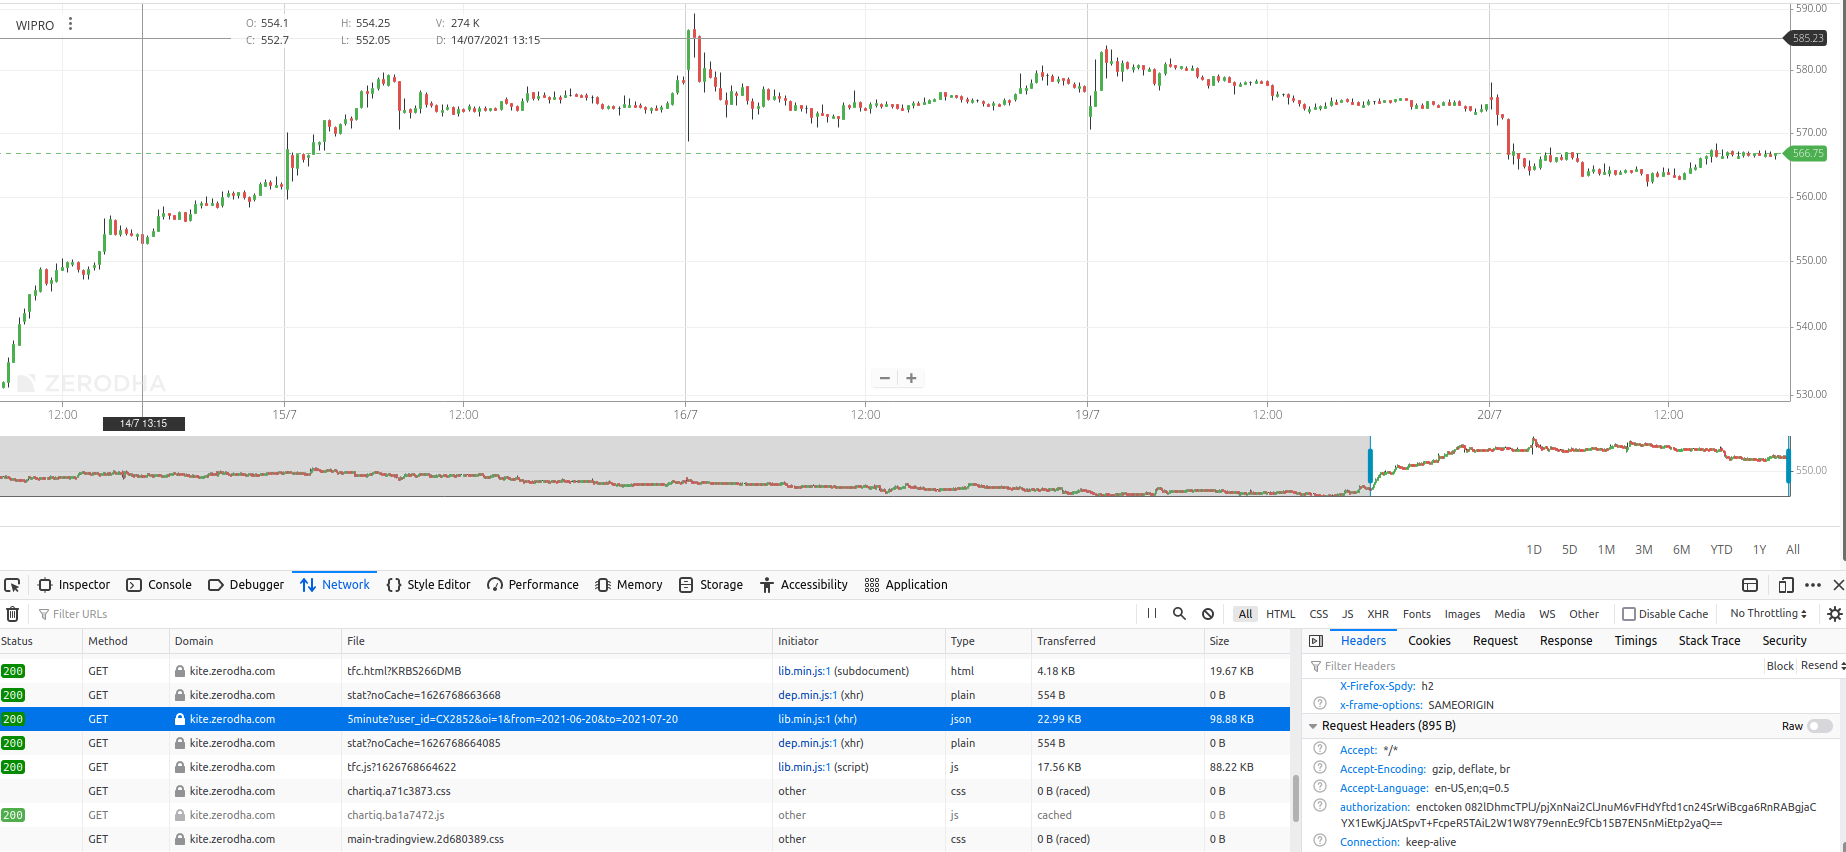


In [2]:
#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

from Classes.IntradayDownloader import IntradayDownloader
#token
token='969473'
#zerodha userid
userid='CX2852'
#frequency which you want to download minute,hour
timeframe='minute'
#end date
to_date=date(2021,7,8)
#start date
from_date=date(2021,6,8)
#authtoken
authtoken='enctoken 082lDhmcTPlJ/pjXnNai2ClJnuM6vFHdYftd1cn24SrWiBcga6RnRABgjaCYX1EwKjJAtSpvT+FcpeR5TAiL2W1W8Y79ennEc9fCb15B7EN5nMiEtp2yaQ=='
x=IntradayDownloader(user=userid,token=token,timeframe=timeframe,authtoken=authtoken)
df=x.get_intraday_data(start_date=from_date,end_date=to_date)
df.head()


,timestamp,Open,High,Low,Close,V,OI
0,2021-06-08T09:15:00+0530,550.00,551.65,549.50,550.65,149238,0
1,2021-06-08T09:16:00+0530,550.70,551.40,549.75,551.10,111066,0
2,2021-06-08T09:17:00+0530,551.35,553.10,551.05,552.70,51836,0
3,2021-06-08T09:18:00+0530,552.70,553.80,552.70,553.50,48070,0
4,2021-06-08T09:19:00+0530,553.75,554.60,553.65,554.05,96110,0


In [4]:
#Save the datframe downloaded from zerodha to a local folder
df.to_csv(f'/home/david/Documents/DataScience/Intraday_Data/IT_Sector/WIPRO/WIPRO_{from_date}_{to_date}.txt',header=False,index=False)